In [16]:
from keras.models import load_model
import os
import json
import numpy as np
import pandas as pd
from common_processing import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
test_model = load_model('./Checkpoints/Weight/fruit_classify_der_resnet.h5')

In [5]:
#Generate test data
X_data = []
y_true = []
count = 0
all_path = './new_data/20200320/'
for folder in os.listdir(all_path):
    if '.' not in folder:
        lbl = count
        fld_path = all_path + folder + '/'
        for dirr in os.listdir(fld_path):
            if '_i.csv' in dirr:
                print(fld_path + dirr)
                df = pd.read_csv(fld_path + dirr)
                if len(df.columns) > 2:
                    df = df.loc[:, df.columns.intersection(['Wavelength (nm)', 'Sample Signal (unitless)'])]
                try:
                    dfnp = df.to_numpy()[:, 1]
                    if dfnp.shape != (228, ):
                        print(dfnp.shape)
                    X_data.append(np.expand_dims(input_norm(calc_deriative(dfnp)), 1))
                    y_true.append(folder)
                except IndexError:
                    print(df)
#                     raise Exception
        count += 1
X_data = np.array(X_data)
y_true = np.array(y_true)

./new_data/20200320/Apple/Column 1_008048_20200320_140621_i.csv
./new_data/20200320/Apple/Column 1_008049_20200320_140702_i.csv
./new_data/20200320/Apple/Column 1_008050_20200320_140718_i.csv
./new_data/20200320/Apple/Column 1_008051_20200320_140733_i.csv
./new_data/20200320/Apple/Column 1_008052_20200320_140749_i.csv
./new_data/20200320/Apple/Column 1_008053_20200320_140805_i.csv
./new_data/20200320/Apple/Column 1_008054_20200320_140818_i.csv
./new_data/20200320/Apple/Column 1_008055_20200320_140837_i.csv
./new_data/20200320/Apple/Column 1_008058_20200320_140921_i.csv
./new_data/20200320/Apple/Column 1_017003_20200320_144216_i.csv
./new_data/20200320/Apple/Column 1_008056_20200320_140851_i.csv
./new_data/20200320/Apple/Column 1_008057_20200320_140906_i.csv
./new_data/20200320/Apple/Column 1_008059_20200320_140944_i.csv
./new_data/20200320/Apple/Column 1_008060_20200320_140957_i.csv
./new_data/20200320/Apple/Column 1_008061_20200320_141011_i.csv
./new_data/20200320/Apple/Column 1_00806

./new_data/20200320/Guava/Column 1_017025_20200320_144831_i.csv
./new_data/20200320/Guava/Column 1_009035_20200320_142421_i.csv
./new_data/20200320/Guava/Column 1_009036_20200320_142440_i.csv
./new_data/20200320/Guava/Column 1_009038_20200320_142527_i.csv
./new_data/20200320/Guava/Column 1_009039_20200320_142542_i.csv
./new_data/20200320/Guava/Column 1_009040_20200320_142555_i.csv
./new_data/20200320/Guava/Column 1_009041_20200320_142611_i.csv
./new_data/20200320/Guava/Column 1_009042_20200320_142625_i.csv
./new_data/20200320/Guava/Column 1_009043_20200320_142640_i.csv
./new_data/20200320/Guava/Column 1_009044_20200320_142653_i.csv
./new_data/20200320/Guava/Column 1_009045_20200320_142706_i.csv
./new_data/20200320/Guava/Column 1_009046_20200320_142720_i.csv
./new_data/20200320/Guava/Column 1_009047_20200320_142735_i.csv
./new_data/20200320/Guava/Column 1_009048_20200320_142749_i.csv
./new_data/20200320/Guava/Column 1_017024_20200320_144804_i.csv
./new_data/20200320/Guava/Column 1_01702

In [5]:
# y_true

In [6]:
print(X_data.shape)
print(y_true.shape)

(330, 227, 1)
(330,)


In [7]:
with open('./label_dict.json', 'r') as label_dict_file:
    label_dict = json.loads(label_dict_file.read())
print(label_dict)

['Apple', 'Avocado', 'Banana', 'DragonFruit', 'Guava', 'Lychee', 'Mango', 'Potato', 'Tomato']


In [8]:
y_pred = test_model.predict(X_data)

In [9]:
y_pred = [label_dict[np.argmax(pred)] for pred in y_pred]

In [10]:
total_prediction = 0
total_correct = 0
for pred, label in zip(y_pred, y_true):
    total_prediction += 1
    if pred == label:
        total_correct += 1
    else:
        print('True: {} but predict: {}'.format(label, pred))
print('Test accuracy: {0:.2f}'.format(total_correct * 100/total_prediction))

True: Apple but predict: Mango
True: DragonFruit but predict: Guava
True: DragonFruit but predict: Tomato
True: DragonFruit but predict: Banana
True: Guava but predict: DragonFruit
True: Guava but predict: DragonFruit
True: Guava but predict: DragonFruit
True: Guava but predict: DragonFruit
Test accuracy: 97.58


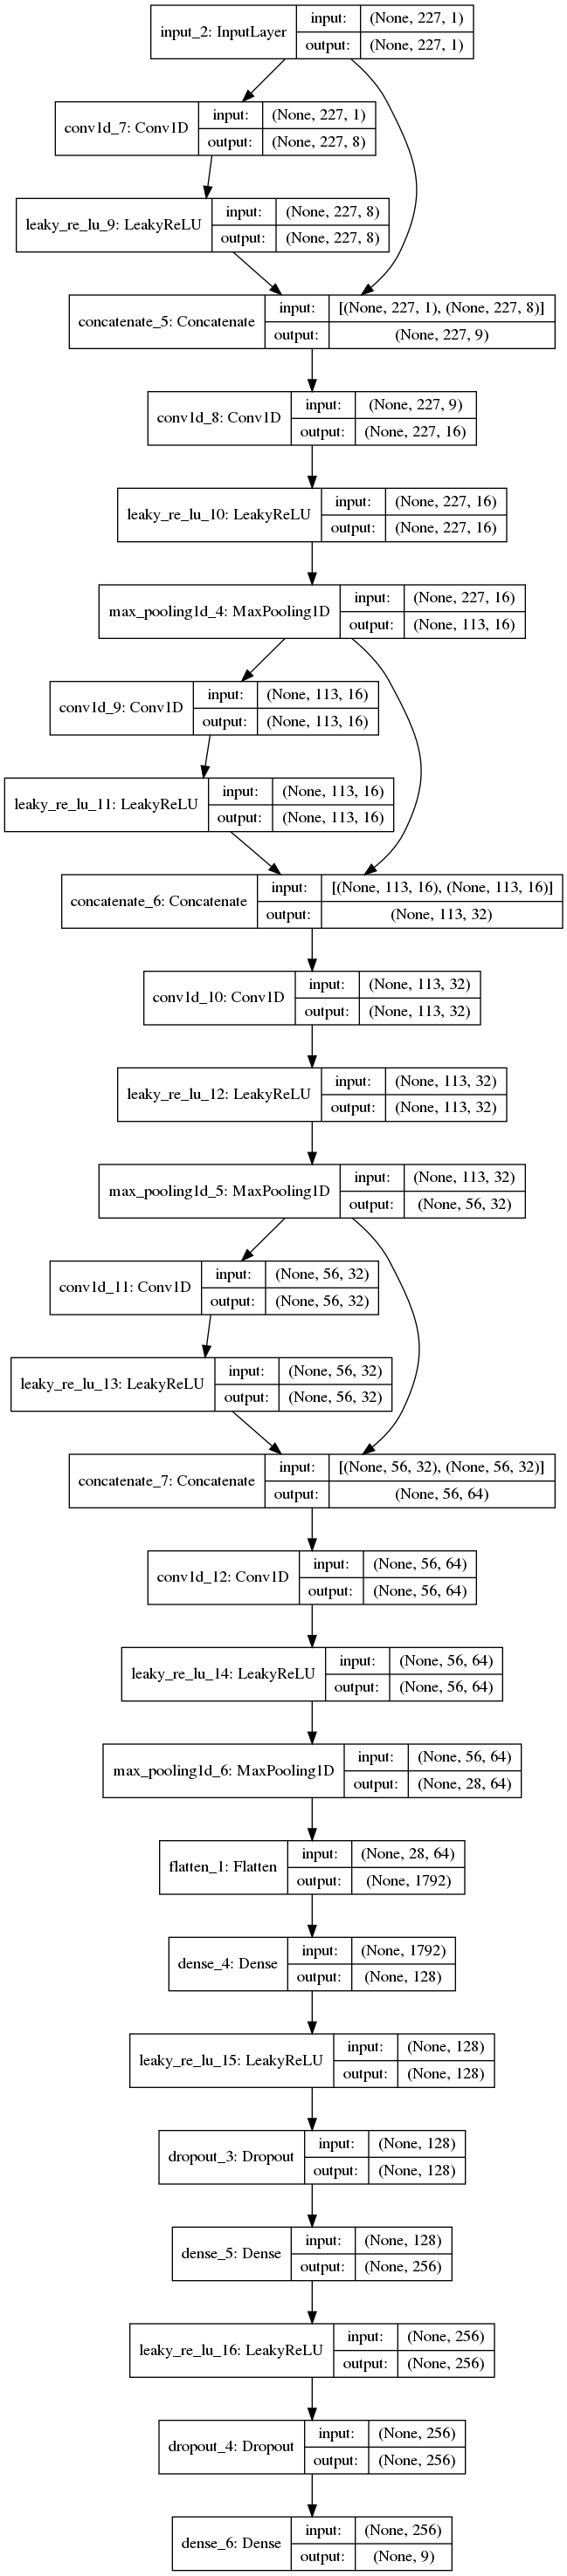

In [12]:
from keras.utils import plot_model
plot_model(test_model, to_file='./Checkpoints/fruit_classify_der_resnet.png', show_shapes=True)

[[65  0  0  0  0  0  0]
 [ 0 66  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0 63  4  0  0]
 [ 0  0  0  1 62  0  0]
 [ 1  0  0  0  0 66  0]
 [ 0  0  0  1  0  0  0]]


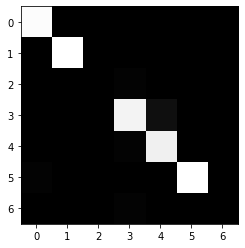

In [17]:
plt.imshow(confusion_matrix(y_pred, y_true), 'gray')
print(confusion_matrix(y_pred, y_true))